## Project Part 1

### Unlocking Automotive Trends

#### Data Preprocessing

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("DS1_C4_S9_Car_Data.xlsx")
# Filling missing values in each columns
# Seperating numerical and categorial columns.

num_cols = df.select_dtypes(include=['number', 'float64', 'int64']).columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object' or col not in num_cols]

for col in num_cols:
    df[col].fillna(df[col].median(),inplace=True)

for col in cat_cols:
    df[col].fillna("Not Available",inplace=True)

In [4]:
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,Not Available,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,Not Available,Not Available,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


### Task 1

In [5]:
b_types = df.groupby(by='Body_Type')['Make'].count().sort_values(ascending=False)
top_b_types = b_types.head(5)
print("Top 5 body types based on count of each are :",top_b_types)

Top 5 body types based on count of each are : Body_Type
SUV          447
Sedan        333
Hatchback    316
Coupe         41
MPV           39
Name: Make, dtype: int64


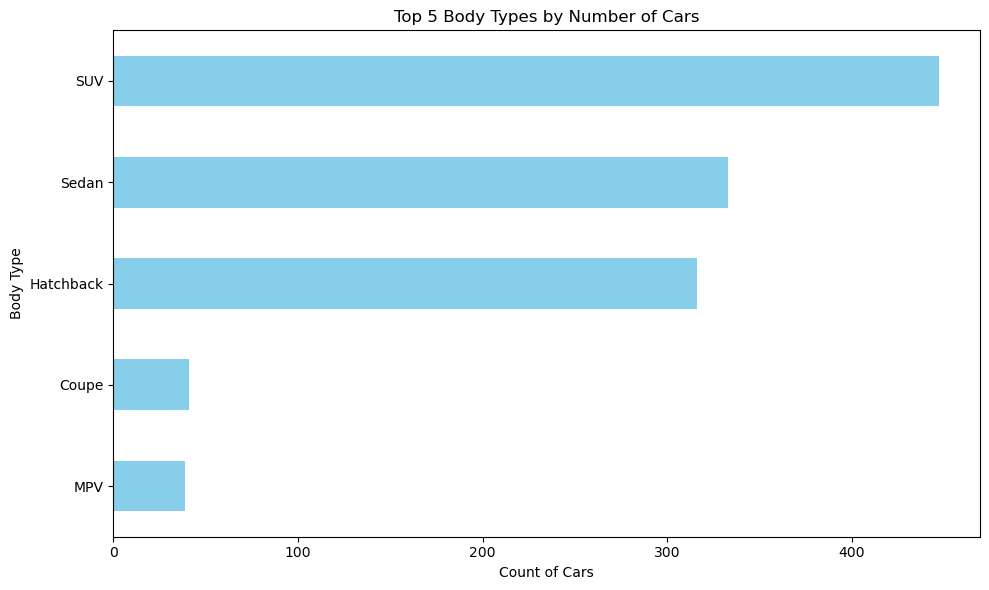

In [6]:
# plotting horizontal bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_b_types.plot(kind='barh', color='skyblue')
plt.xlabel('Count of Cars')
plt.ylabel('Body Type')
plt.title('Top 5 Body Types by Number of Cars')##
plt.gca().invert_yaxis()  # To display the highest count on top
plt.tight_layout()
plt.show()

### Task 2

In [7]:
modes = df[df['Drive_Modes'].str.lower().str.contains('normal')|
           df['Drive_Modes'].str.lower().str.contains('comfort')|
           df['Drive_Modes'].str.lower().str.contains('eco')|
           df['Drive_Modes'].str.lower().str.contains('sport')|
           df['Drive_Modes'].str.lower().str.contains('power')]
print("Cars that can adapt to various driving conditions like normal,comfort,eco,sport and power :\n")
print(modes[['Model','Variant','Drive_Modes']],'\n')
print("Total number of such cars :",len(modes))

Cars that can adapt to various driving conditions like normal,comfort,eco,sport and power :

                  Model                  Variant                  Drive_Modes
24                 Eeco                    5 Str                       Normal
25                 Eeco                    7 Str                       Normal
27                 Eeco    5 Str With Ac+Htr Cng                       Normal
28                 Eeco       5 Str With Htr Cng                       Normal
59                Tiago             Revotron Xza           Normal, Eco, Sport
...                 ...                      ...                          ...
1250            Octavia         Onyx 2.0 Tdi Dsg  Comfort, Eco, Sport, Normal
1251  Mercedes-Benz Glc          200 Progressive  Normal, Comfort, Eco, Sport
1252  Mercedes-Benz Glc  220D 4Matic Progressive  Normal, Comfort, Eco, Sport
1253      Cayenne Coupe                     Base           Normal, Eco, Sport
1254      Cayenne Coupe                    Turbo 

### Task 3 : Fuel Efficiency Analysis

In [8]:
top10 = df.groupby('Make')['City_Mileage_km_litre'].max().sort_values(ascending=False).head(10)
top10

Make
Mahindra         110.00
Maruti Suzuki     28.40
Honda             25.50
Renault           25.17
Tata              24.12
Hyundai           24.00
Datsun            21.38
Jaguar            21.27
Fiat              21.20
Not Available     20.62
Name: City_Mileage_km_litre, dtype: float64

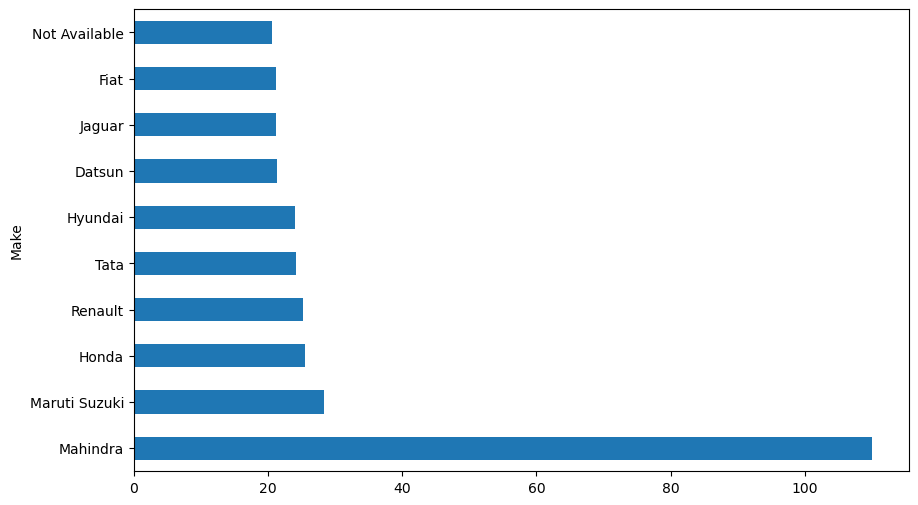

In [9]:
plt.figure(figsize=(10,6))
top10.plot(kind='barh')
plt.show()
# Yes i observe one outlier , Mahindra. It can be treated by replacing it with median city milage.

### Task 4

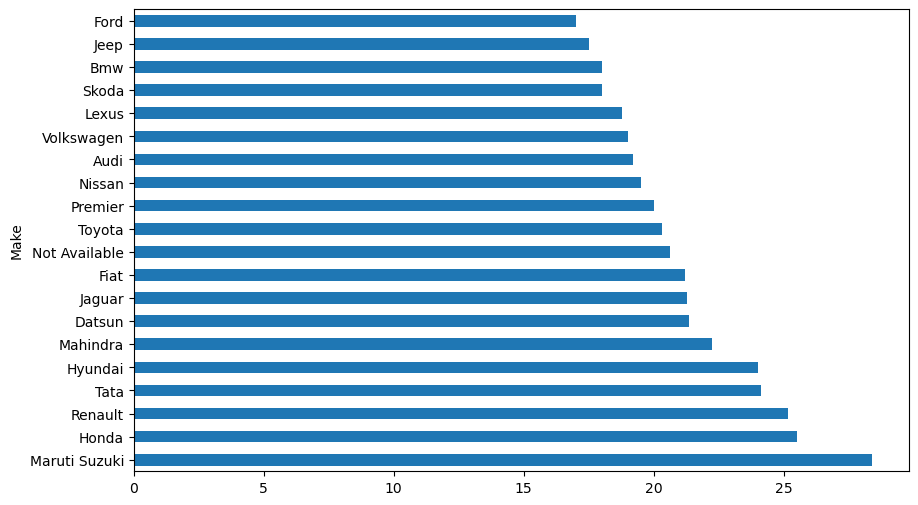

In [10]:
non_electric = df[~df['Fuel_Type'].str.lower().str.contains('electric',na=False)]
top20 = non_electric.groupby('Make')['City_Mileage_km_litre'].max().sort_values(ascending=False).head(20)
# plotting
plt.figure(figsize=(10,6))
top20.plot(kind='barh')
plt.show()

### Task 5

In [11]:
brands = ['Hyundai', 'Mahindra', 'Renault', 'Skoda']
filtered_df = df[df['Make'].isin(brands)]
filtered_df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
12,12,Renault,Kwid,Rxe 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Yes,Not Available,Driver frontal airbag,Yes,Yes
13,13,Renault,Kwid,Std 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Not Available,Not Available,Not Available,Not Available,Not Available,Yes,Not Available,Driver frontal airbag,Not Available,Yes
14,14,Renault,Kwid,Rxl 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,Not Available,Driver frontal airbag,Yes,Yes
15,15,Renault,Kwid,Rxt 0.8,799.0,3.0,4.0,28.0,Petrol,1490.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Yes,Not Available,Driver frontal airbag,Yes,Yes
16,16,Renault,Kwid,Rxt 1.0,999.0,3.0,4.0,28.0,Petrol,1490.0,...,Yes,Yes,Not Available,Not Available,Not Available,Yes,Not Available,Driver frontal airbag,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,1249,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,50.0,Petrol,1476.0,...,Yes,Yes,Yes,"Normal, Comfort, Eco, Sport",Yes,Yes,1860 kg,"Drive side airbag, Front passenger curtain air...",Yes,Yes
1250,1250,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,50.0,Diesel,1476.0,...,Yes,Yes,Yes,"Comfort, Eco, Sport, Normal",Yes,Yes,1915 kg,"Drive side airbag, Driver frontal airbag, Fron...",Yes,Yes
1255,1255,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,50.0,Diesel,1540.0,...,Not Available,Yes,Not Available,Not Available,Not Available,Not Available,1630 kg,Not Available,Not Available,Not Available
1256,1256,Mahindra,Verito,1.5 D4 Bs-Iv,1461.0,4.0,3.0,50.0,Diesel,1540.0,...,Yes,Yes,Not Available,Not Available,Not Available,Not Available,1630 kg,Not Available,Yes,Not Available


In [12]:
# Pivot Table – Mean of City Mileage:
pivot_city_mean = pd.pivot_table(filtered_df, 
                                 index='Make', 
                                 values='City_Mileage_km_litre', 
                                 aggfunc='mean')
print("Mean City Mileage:")
print(pivot_city_mean)

Mean City Mileage:
          City_Mileage_km_litre
Make                           
Hyundai               16.017000
Mahindra              18.973866
Renault               19.384444
Skoda                 14.357442


In [13]:
pivot_city_median = pd.pivot_table(filtered_df,
                                  index = 'Make',
                                  values = 'City_Mileage_km_litre',
                                  aggfunc = 'median')
print("Median city Milage.")
print(pivot_city_median)

Median city Milage.
          City_Mileage_km_litre
Make                           
Hyundai                   15.29
Mahindra                  15.50
Renault                   21.04
Skoda                     15.10


In [14]:
pivot_highway_mean = pd.pivot_table(filtered_df,
                                  index = 'Make',
                                  values = 'Highway_Mileage_km_litre',
                                  aggfunc = 'mean')
print("Mean highway Milage.")
print(pivot_highway_mean)

Mean highway Milage.
          Highway_Mileage_km_litre
Make                              
Hyundai                  17.538231
Mahindra                 17.645126
Renault                  17.315000
Skoda                    17.252093


In [15]:
pivot_highway_median = pd.pivot_table(filtered_df,
                                  index = 'Make',
                                  values = 'Highway_Mileage_km_litre',
                                  aggfunc = 'median')
print("Median highway Milage.")
print(pivot_highway_median)

Median highway Milage.
          Highway_Mileage_km_litre
Make                              
Hyundai                      17.19
Mahindra                     17.19
Renault                      17.19
Skoda                        17.19


### Task 6

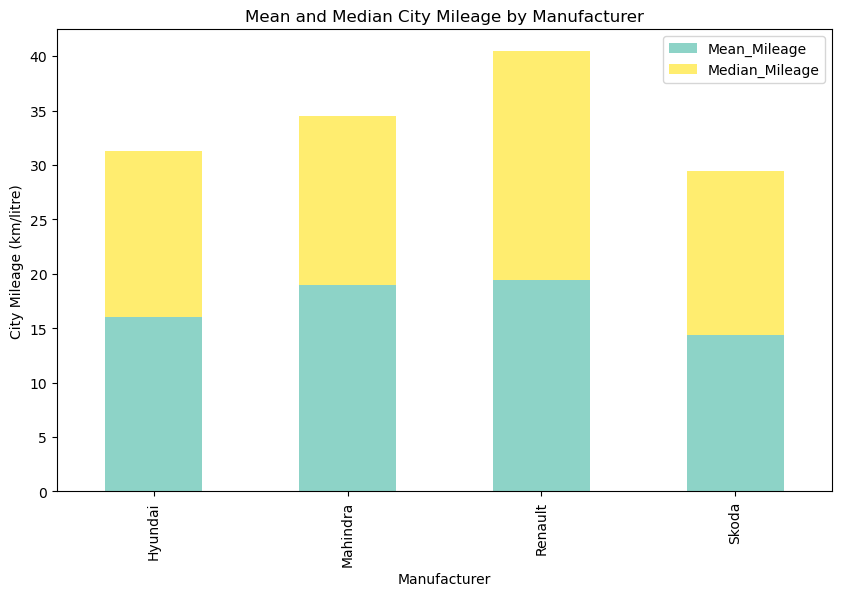

In [16]:
combined = pd.concat([pivot_city_mean, pivot_city_median], axis=1)
combined.columns = ['Mean_Mileage', 'Median_Mileage']
combined.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Mean and Median City Mileage by Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.xlabel('Manufacturer')
plt.show()

### Task 7

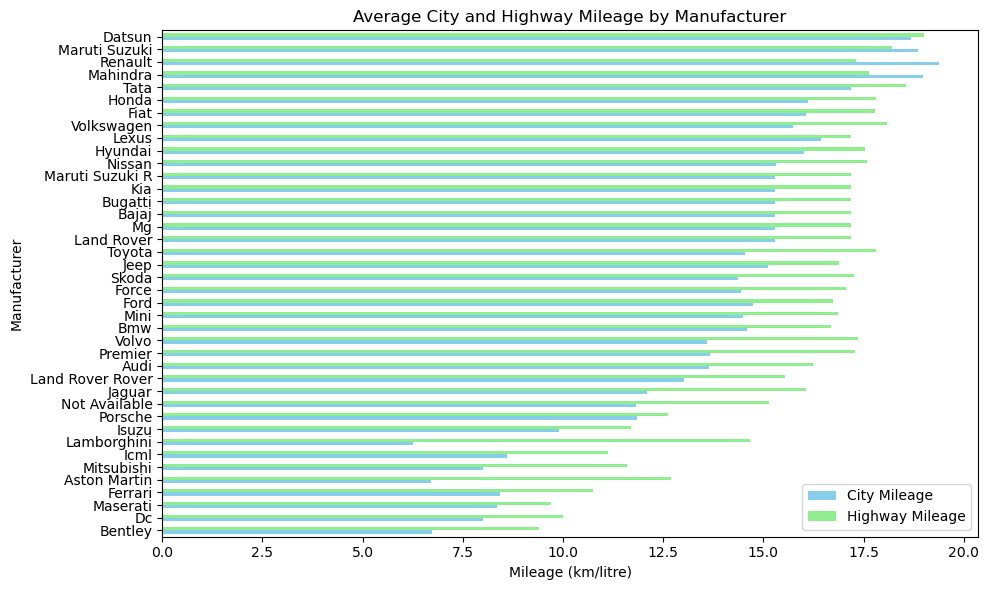

In [17]:
avg_mileage = df.groupby(by = 'Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean()
avg_mileage['Average_Mileage'] = avg_mileage.mean(axis=1)
avg_mileage_sorted = avg_mileage.sort_values(by = 'Average_Mileage')
# Plotting
avg_mileage_sorted[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].plot(
    kind='barh', figsize=(10, 6), color=['skyblue', 'lightgreen']
)

plt.xlabel('Mileage (km/litre)')
plt.ylabel('Manufacturer')
plt.title('Average City and Highway Mileage by Manufacturer')
plt.legend(['City Mileage', 'Highway Mileage'])
plt.tight_layout()
plt.show()

### Task 8

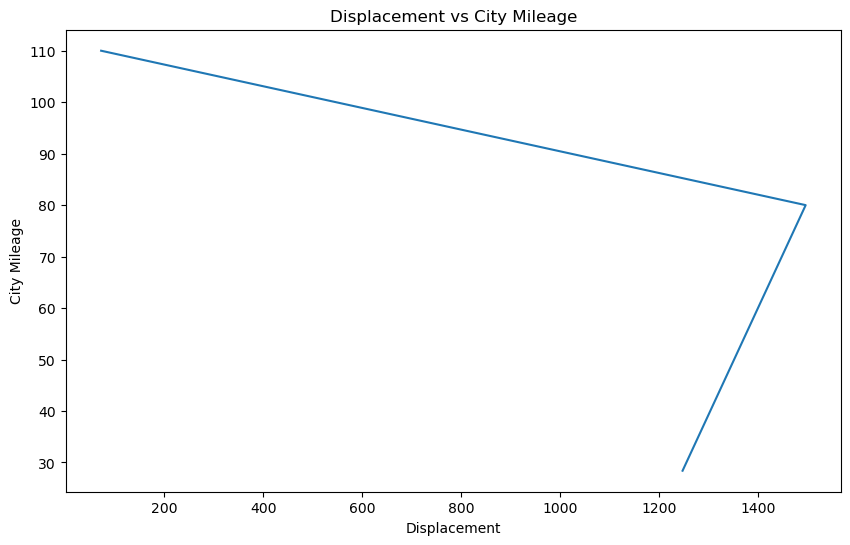

In [18]:
df_sort_10 = df.sort_values(by='City_Mileage_km_litre', ascending=False).head(10)
#df_sort_10
plt.figure(figsize=(10,6))
plt.plot(df_sort_10['Displacement'],df_sort_10['City_Mileage_km_litre'])
plt.xlabel('Displacement')
plt.ylabel('City Mileage')
plt.title('Displacement vs City Mileage')
plt.show()

In [19]:
'''Observations from the Graph:'''
# 1. City mileage decreases as displacement increases — expected trend.

# 2. One car shows very high mileage (~110 km/l) — unusually high.

# 3. One car with very high displacement (~1500 cc) has very low mileage (~30 km/l).

# 4. The line graph has sharp dips and rises, indicating inconsistent data.

'''Unusual Points:'''
# 1. 110 km/l mileage is suspicious — could be an electric vehicle or data error.

# 2. Low mileage (~30 km/l) at high displacement (~1500 cc) is expected but appears extreme compared to others.

'''How to Resolve:'''
# 1. Check data source for units or entry mistakes.

# 2. Filter out extreme outliers for cleaner trends.

# 3. Annotate or highlight outliers on the graph for clarity.

'How to Resolve:'

### Task 9

#### Hyundai

(array([17.,  3., 75., 10.,  5., 11.,  3.,  4.,  0.,  2.]),
 array([13.1 , 14.19, 15.28, 16.37, 17.46, 18.55, 19.64, 20.73, 21.82,
        22.91, 24.  ]),
 <BarContainer object of 10 artists>)

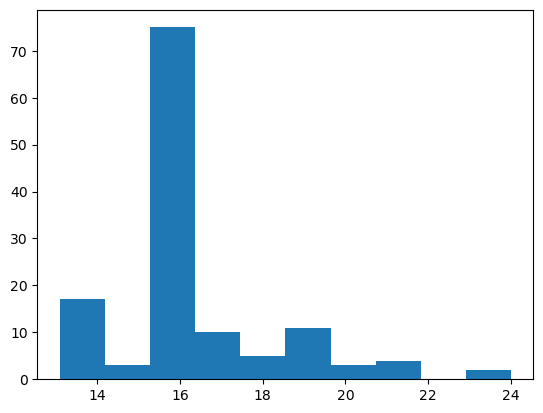

In [20]:
df_hyundai = df[df['Make'].str.contains('Hyundai')]
plt.hist(df_hyundai['City_Mileage_km_litre'])

#### Suzuki

(array([ 5.,  3., 77.,  8.,  3., 15., 11., 23.,  2., 16.]),
 array([10.2 , 12.02, 13.84, 15.66, 17.48, 19.3 , 21.12, 22.94, 24.76,
        26.58, 28.4 ]),
 <BarContainer object of 10 artists>)

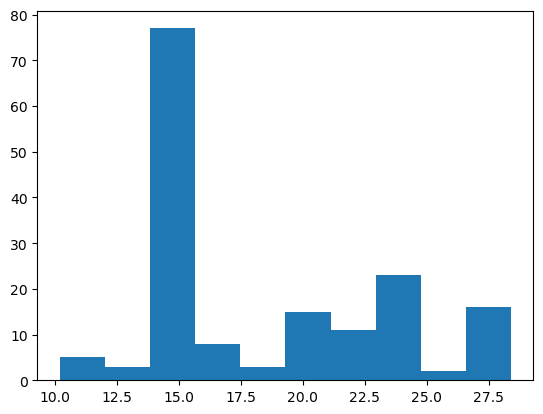

In [21]:
df_suzuki = df[df['Make'].str.contains('Suzuki')]
plt.hist(df_suzuki['City_Mileage_km_litre'])

#### Tata

(array([ 3.,  4.,  8., 52.,  0.,  4.,  7.,  0.,  0., 22.]),
 array([10.8  , 12.132, 13.464, 14.796, 16.128, 17.46 , 18.792, 20.124,
        21.456, 22.788, 24.12 ]),
 <BarContainer object of 10 artists>)

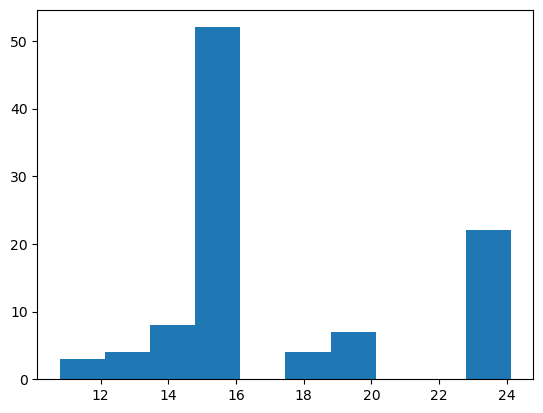

In [22]:
df_tata = df[df['Make'].str.contains('Tata')]
plt.hist(df_tata['City_Mileage_km_litre'])

#### Bmw

(array([ 1.,  0.,  2.,  0.,  0.,  1.,  4.,  1., 25.,  3.]),
 array([ 4.45 ,  5.805,  7.16 ,  8.515,  9.87 , 11.225, 12.58 , 13.935,
        15.29 , 16.645, 18.   ]),
 <BarContainer object of 10 artists>)

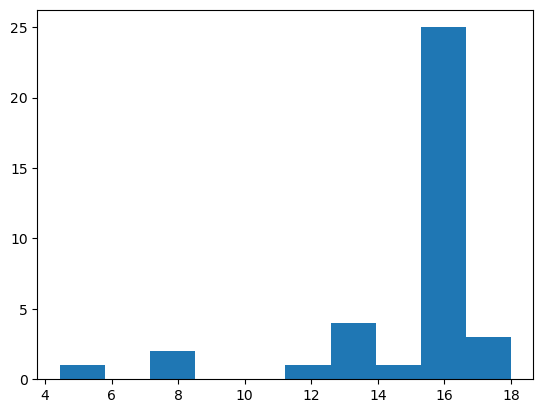

In [23]:
df_bmw = df[df['Make'].str.contains('Bmw')]
plt.hist(df_bmw['City_Mileage_km_litre'])

In [24]:
''' Tata has the most skewed mileage distribution due to the sharp concentration at lower 
    mileage values and a significant tail on the higher end.'''

' Tata has the most skewed mileage distribution due to the sharp concentration at lower \n    mileage values and a significant tail on the higher end.'

### Task 10

In [25]:
df2 = df[['Make','Valves_Per_Cylinder', 'Kerb_Weight', 'Displacement',
          'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre',
          'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight']]
df2.isnull().sum() # shows 0 missing values.

Make                        0
Valves_Per_Cylinder         0
Kerb_Weight                 0
Displacement                0
Fuel_Tank_Capacity_litre    0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Power                       0
Torque                      0
Gross_Vehicle_Weight        0
dtype: int64

### Task 11

In [26]:
# Clean 'kg' and convert to numeric (in pounds)
df2["Kerb_Weight"] = df2["Kerb_Weight"].astype(str).str.replace("kg", "", regex=False)
df2["Kerb_Weight"] = pd.to_numeric(df2["Kerb_Weight"], errors='coerce') * 2.2

df2["Gross_Vehicle_Weight"] = df2["Gross_Vehicle_Weight"].astype(str).str.replace("kg", "", regex=False)
df2["Gross_Vehicle_Weight"] = pd.to_numeric(df2["Gross_Vehicle_Weight"], errors='coerce') * 2.2

#  Fill missing/NaN  values with median
df2["Kerb_Weight"].fillna(df2["Kerb_Weight"].median(), inplace=True)
df2["Gross_Vehicle_Weight"].fillna(df2["Gross_Vehicle_Weight"].median(), inplace=True)
df2

,Make,Valves_Per_Cylinder,Kerb_Weight,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,Tata,2.0,1452.0,624.0,24.0,23.60,17.19,38.0,51.0,3850.0
1,Tata,2.0,1595.0,624.0,24.0,23.60,17.19,38.0,51.0,3850.0
2,Tata,2.0,1562.0,624.0,15.0,15.29,17.19,38.0,51.0,3850.0
3,Tata,2.0,1595.0,624.0,24.0,23.60,17.19,38.0,51.0,3850.0
4,Tata,2.0,1595.0,624.0,24.0,23.60,17.19,38.0,51.0,3850.0
...,...,...,...,...,...,...,...,...,...,...
1271,Honda,4.0,2574.0,1498.0,40.0,22.60,25.10,100.0,200.0,3399.0
1272,Honda,4.0,2585.0,1498.0,40.0,22.60,25.10,100.0,200.0,3410.0
1273,Honda,4.0,2435.4,1497.0,40.0,18.00,18.00,119.0,145.0,3260.4
1274,Honda,4.0,2376.0,1497.0,40.0,14.30,16.40,119.0,145.0,3201.0


### Task 12

In [27]:
pivot_disp = df2.pivot_table(
    values='Displacement',
    index='Make',
    aggfunc=['mean', 'median', 'std']
)
pivot_disp.columns = ['Mean', 'Median', 'Std_Dev']
pivot_disp['Coeff_Variation'] = pivot_disp['Std_Dev'] / pivot_disp['Mean']
pivot_disp.sort_values(by='Coeff_Variation', ascending=False, inplace=True)
pivot_disp.head(10)

,Mean,Median,Std_Dev,Coeff_Variation
Make,,,,
Not Available,2986.546667,2143.0,1730.112044,0.579302
Jeep,2102.357143,1956.0,991.904872,0.471806
Jaguar,2679.545455,1999.0,1171.060030,0.437037
Ford,1551.325581,1498.0,635.526618,0.409667
Audi,2256.354839,1984.0,836.304352,0.370644
Land Rover Rover,3199.703704,2993.0,1183.611092,0.369913
Toyota,1803.292683,1496.0,641.799947,0.355904
Bmw,2707.918919,2979.0,924.567237,0.341431
Mahindra,1715.890756,1497.0,530.998081,0.309459


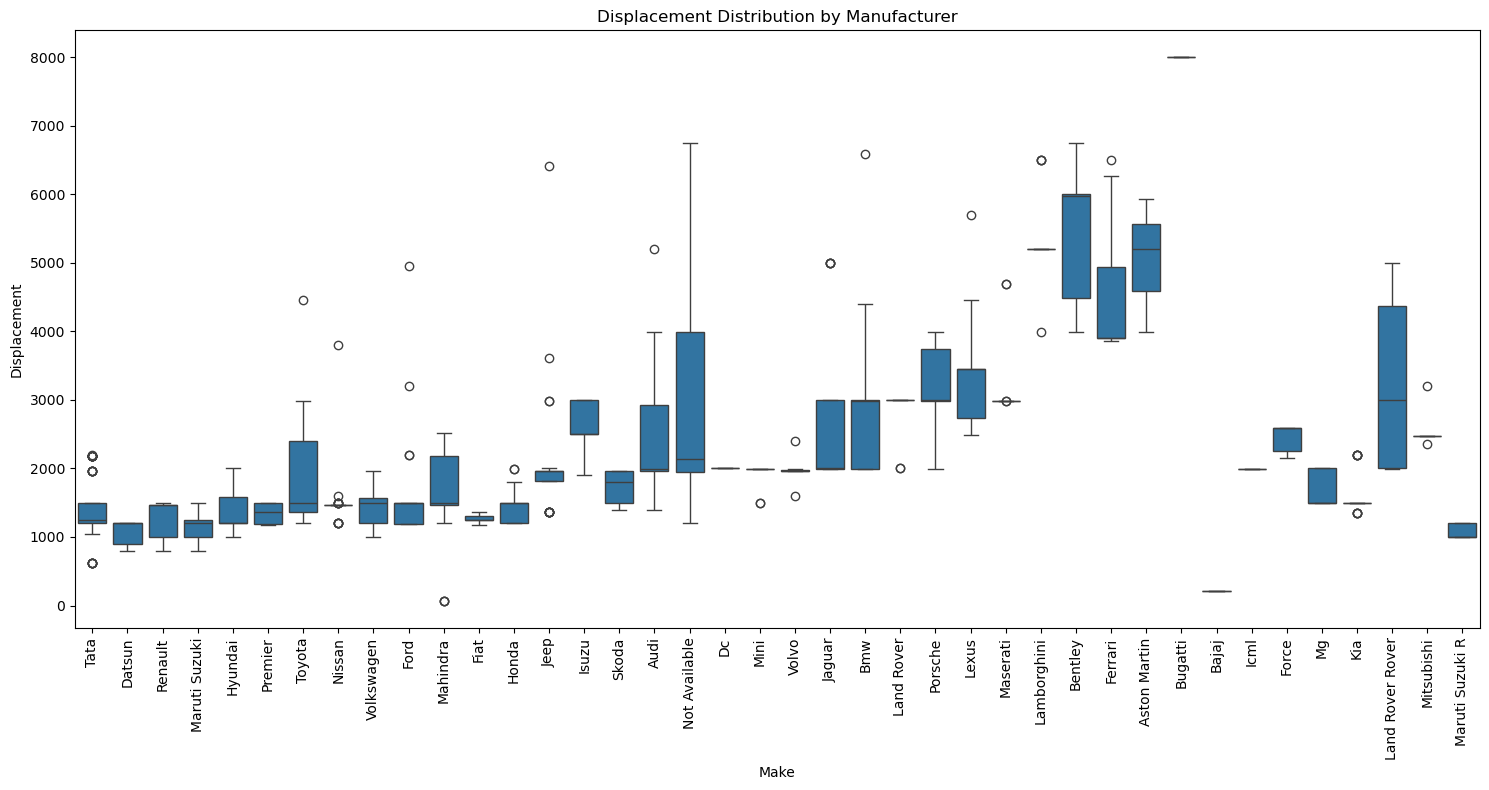

In [28]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='Make', y='Displacement')
plt.xticks(rotation=90)
plt.title("Displacement Distribution by Manufacturer")
plt.tight_layout()
plt.show()

In [29]:
df2['Cylinders'] = df['Cylinders']
df2['Cylinders'].fillna(df2['Cylinders'].median(),inplace = True)
pivot_cyn = df2.pivot_table(
                            values = 'Cylinders',
                            index = 'Make',
                            aggfunc = ['mean','median','std']
                            )
pivot_cyn.columns = ['Mean', 'Median', 'Std_Dev']
pivot_cyn['Coeff_Variation'] = pivot_cyn['Std_Dev'] / pivot_cyn['Mean']
pivot_cyn.sort_values(by='Coeff_Variation', ascending=False, inplace=True)
pivot_cyn.head(10)
#df2['Cylinders'].isnull().sum()

,Mean,Median,Std_Dev,Coeff_Variation
Make,,,,
Not Available,5.960000,4.0,2.887251,0.484438
Audi,5.161290,4.0,1.614451,0.312800
Bmw,5.459459,6.0,1.608909,0.294701
Jaguar,5.090909,4.0,1.477098,0.290144
Maserati,5.777778,6.0,1.563472,0.270601
Land Rover Rover,6.370370,6.0,1.667521,0.261762
Aston Martin,10.666667,12.0,2.309401,0.216506
Porsche,6.285714,6.0,1.325987,0.210952
Ford,3.883721,4.0,0.793104,0.204212


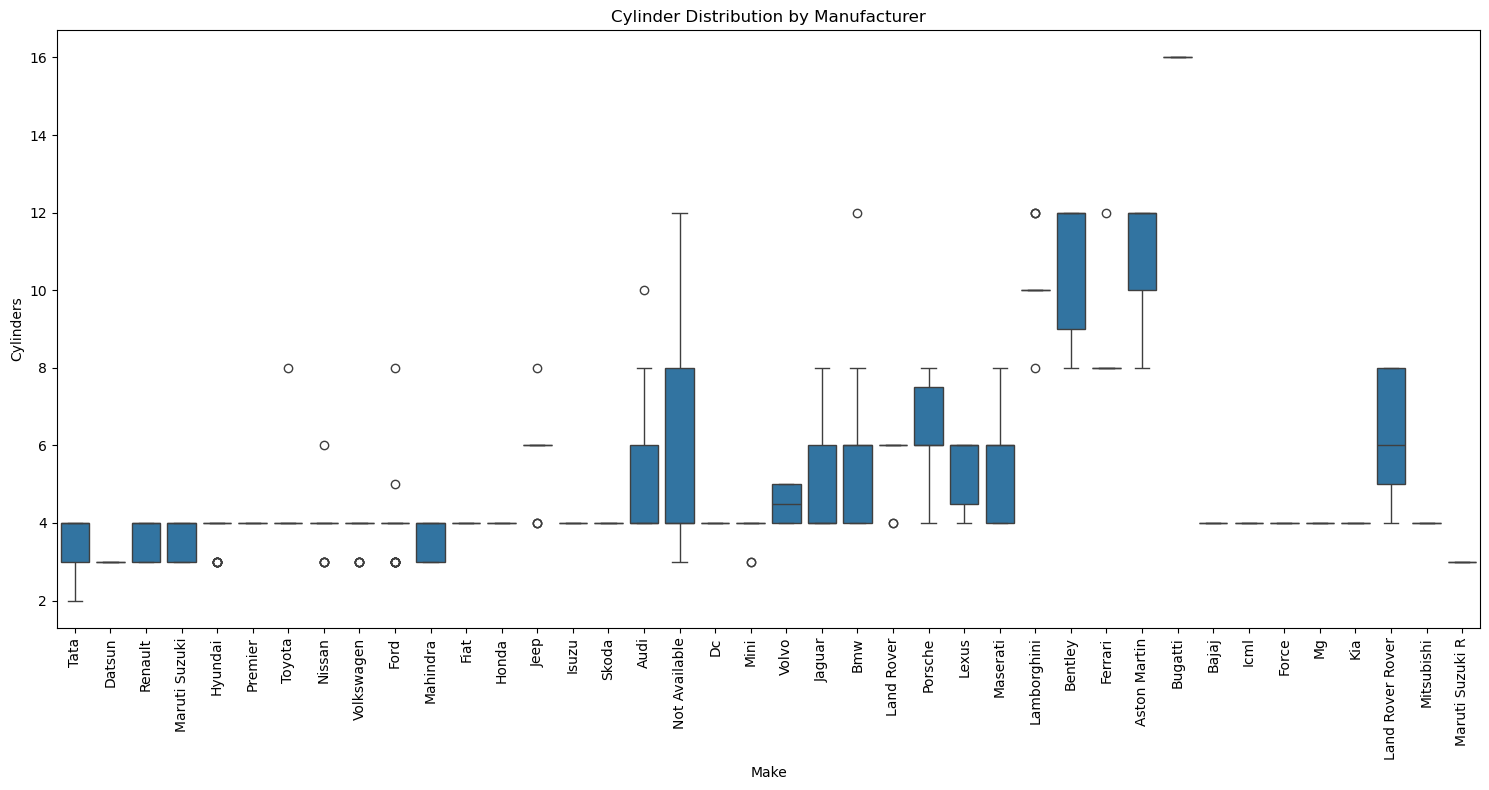

In [30]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='Make', y='Cylinders')
plt.xticks(rotation=90)
plt.title("Cylinder Distribution by Manufacturer")
plt.tight_layout()
plt.show()

In [31]:
pivot_valves = df2.pivot_table(
                            values = 'Valves_Per_Cylinder',
                            index = 'Make',
                            aggfunc = ['mean','median','std']
                            )
pivot_valves.columns = ['Mean', 'Median', 'Std_Dev']
pivot_valves['Coeff_Variation'] = pivot_valves['Std_Dev'] / pivot_cyn['Mean']
pivot_valves.sort_values(by='Coeff_Variation', ascending=False, inplace=True)
pivot_valves.head(10)

,Mean,Median,Std_Dev,Coeff_Variation
Make,,,,
Nissan,5.172414,4.0,2.904048,0.745287
Audi,4.774194,4.0,2.996772,0.580625
Lexus,4.800000,4.0,1.686548,0.312324
Mitsubishi,3.428571,4.0,0.975900,0.243975
Toyota,3.634146,4.0,0.777971,0.192150
Mahindra,3.747899,4.0,0.653783,0.177626
Tata,3.880000,4.0,0.477367,0.137174
Volkswagen,3.882353,4.0,0.477665,0.124928
Land Rover Rover,3.703704,4.0,0.724028,0.113656


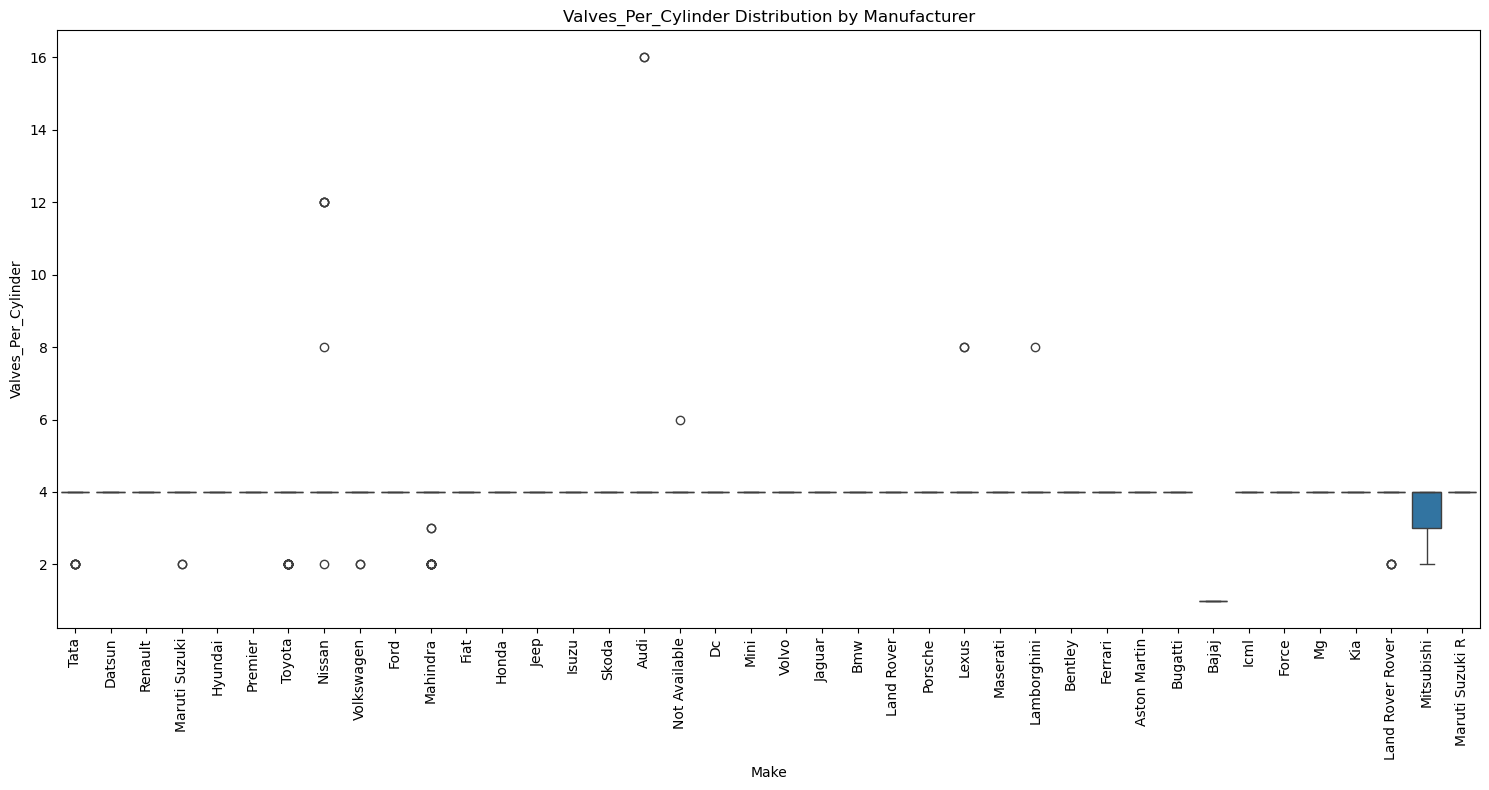

In [32]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='Make', y='Valves_Per_Cylinder')
plt.xticks(rotation=90)
plt.title("Valves_Per_Cylinder Distribution by Manufacturer")
plt.tight_layout()
plt.show()

In [ ]:
'''Summary of Car Manufacturer Analysis'''

'''Displacement:'''
# Luxury brands (e.g., Ferrari, Bentley) have high engine displacements, while economy brands (e.g., Maruti Suzuki, Tata) have lower values — showing a focus on fuel efficiency vs. performance.

'''Cylinders:'''
# High-end cars often use more cylinders (up to 16) for greater power, while most budget-friendly cars use 3–4 cylinders.

'''Valves per Cylinder:'''
# Most manufacturers stick to 2 or 4 valves per cylinder. Outliers could indicate high-performance engines or data issues.

'''Insight:'''
# Engine specs like displacement and cylinder count align with the brand’s market segment — economy vs. luxury. This helps in product positioning, marketing, and R&D planning.

### Task 13

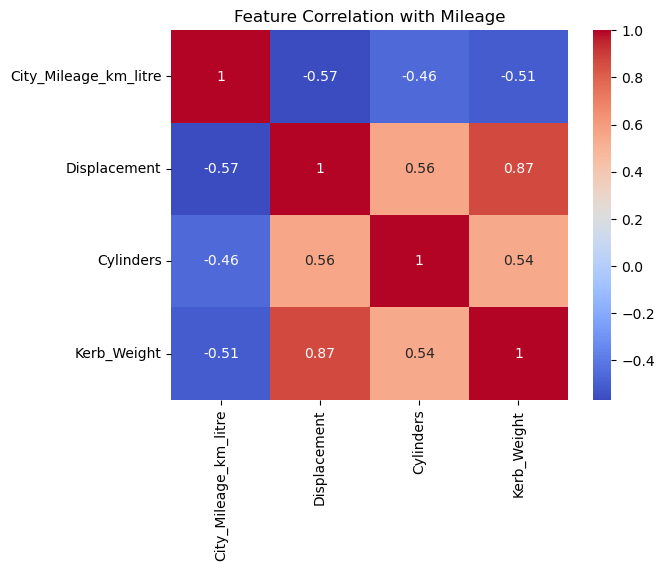

In [39]:
df_sub = df2[df2['Make'].isin(['Renault', 'Toyota', 'Honda'])]

# Plot correlation heatmap
corr = df_sub[['City_Mileage_km_litre', 'Displacement', 'Cylinders', 'Kerb_Weight']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Mileage")
plt.show()

In [41]:
'''All three features — Displacement, Cylinders, and Kerb Weight — show moderate to strong 
negative correlations with city mileage. This means as any of these values increase, fuel 
efficiency generally decreases, which is consistent with automotive engineering principles.'''

'All three features — Displacement, Cylinders, and Kerb Weight — show moderate to strong \nnegative correlations with city mileage. This means as any of these values increase, fuel \nefficiency generally decreases, which is consistent with automotive engineering principles.'

### Task 14

In [42]:
pivot_kerb = df2.pivot_table(
                            values = 'Kerb_Weight',
                            index = 'Make',
                            aggfunc = ['mean','median','std']
                            )
pivot_kerb.columns = ['Mean', 'Median', 'Std_Dev']
pivot_kerb['Coeff_Variation'] = pivot_kerb['Std_Dev'] / pivot_kerb['Mean']
pivot_kerb.sort_values(by='Coeff_Variation', ascending=False, inplace=True)
pivot_kerb.head(10)

,Mean,Median,Std_Dev,Coeff_Variation
Make,,,,
Volvo,4372.500000,3658.6,1585.123013,0.362521
Toyota,2761.295122,2420.0,883.742956,0.320047
Tata,2756.512000,2712.6,840.558270,0.304935
Not Available,3810.752000,3487.0,1136.753470,0.298302
Renault,2298.572222,2712.6,639.360776,0.278156
Land Rover,3088.360000,2712.6,792.171636,0.256502
Land Rover Rover,4537.948148,4694.8,1160.840748,0.255807
Porsche,4070.942857,4103.0,1035.479788,0.254359
Ford,2767.855814,2712.6,666.869666,0.240934


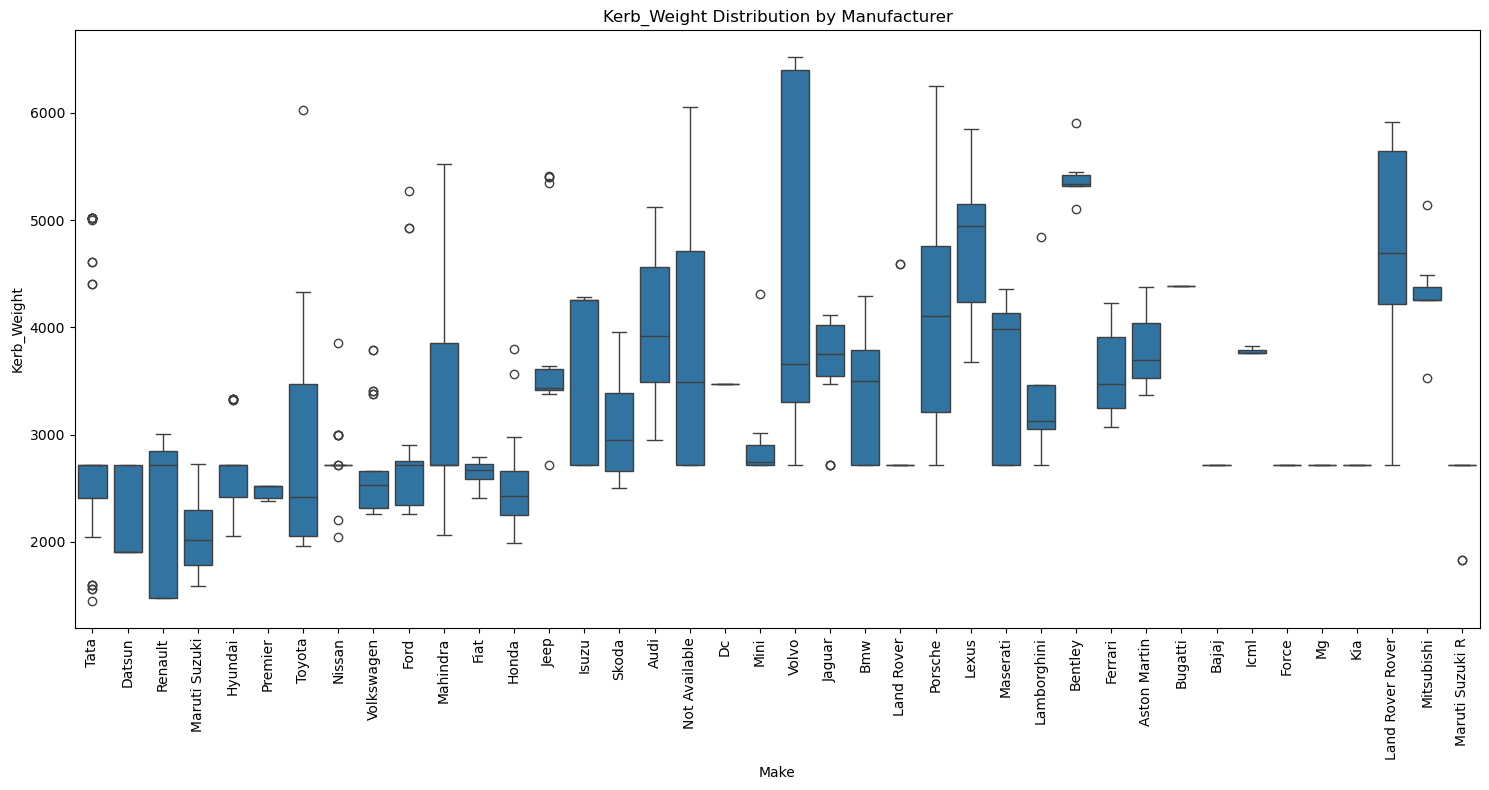

In [43]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='Make', y='Kerb_Weight')
plt.xticks(rotation=90)
plt.title("Kerb_Weight Distribution by Manufacturer")
plt.tight_layout()
plt.show()

In [45]:
pivot_gross = df2.pivot_table(
                            values = 'Gross_Vehicle_Weight',
                            index = 'Make',
                            aggfunc = ['mean','median','std']
                            )
pivot_gross.columns = ['Mean', 'Median', 'Std_Dev']
pivot_gross['Coeff_Variation'] = pivot_gross['Std_Dev'] / pivot_gross['Mean']
pivot_gross.sort_values(by='Coeff_Variation', ascending=False, inplace=True)
pivot_gross.head(10)

,Mean,Median,Std_Dev,Coeff_Variation
Make,,,,
Toyota,4124.731707,3674.0,1068.925364,0.259150
Not Available,4872.765333,4411.0,1151.890648,0.236394
Jeep,4228.242857,3850.0,943.506019,0.223144
Land Rover Rover,5827.555556,6600.0,1205.133805,0.206799
Honda,3304.468750,3850.0,675.411769,0.204393
Force,5159.000000,5522.0,1046.931898,0.202933
Fiat,3621.869565,3850.0,713.823782,0.197087
Porsche,4709.571429,4559.5,876.872740,0.186189
Mahindra,4463.855462,3850.0,807.423951,0.180880


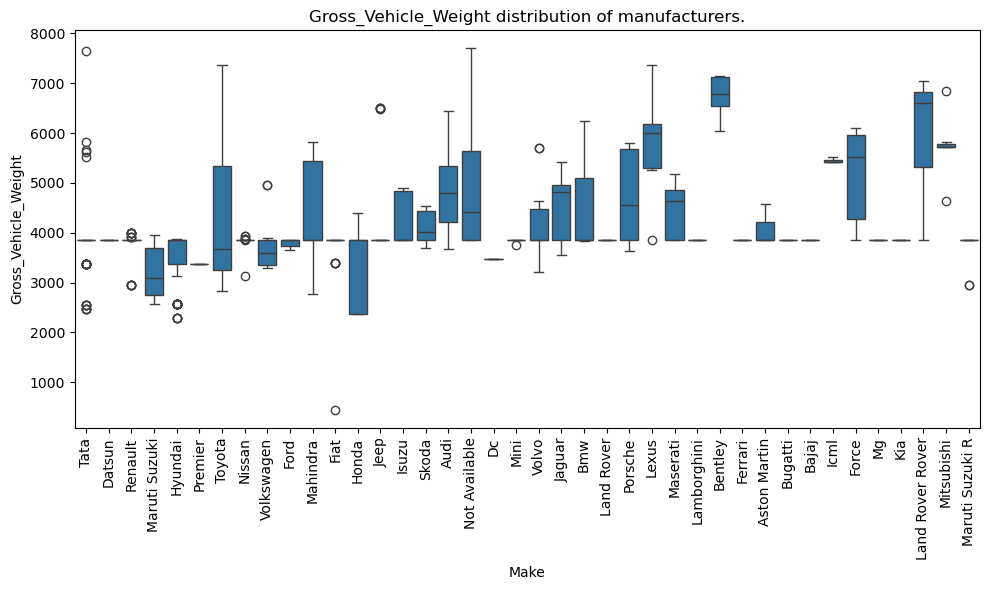

In [47]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df2, x='Make',y='Gross_Vehicle_Weight')
plt.xticks(rotation = 90)
plt.title("Gross_Vehicle_Weight distribution of manufacturers.")
plt.tight_layout()
plt.show()

In [48]:
'''Summary of Box Plots:'''

'''Kerb Weight Plot:'''
# Luxury or premium brands like Land Rover, Porsche, Lexus, and BMW show significantly higher kerb weights.
# In contrast, brands like Renault, Maruti Suzuki, and Datsun have lower kerb weights, indicating lightweight vehicles designed for fuel efficiency.

'''Gross Vehicle Weight Plot:'''
# A similar trend appears — high-end brands like Bentley, Lamborghini, and Land Rover have heavier vehicles.
# Economy brands (e.g., Renault, Honda, Toyota) show moderate gross vehicle weight, consistent with compact or mid-size models.

'Gross Vehicle Weight Plot:'